## Assignment 3 Data Analysis using Pandas

This assignment will contain 1 question with details as below. The due date is October 16 (Friday), 2020 23:59PM. Each late day will result in 20% loss of total points.

# Question 1 (100 points) Celluloid ceiling

Wonder Woman             |  Captain Marvel
:-------------------------:|:-------------------------:
![wonderwoman](https://upload.wikimedia.org/wikipedia/en/e/ed/Wonder_Woman_%282017_film%29.jpg) | ![marvel](https://upload.wikimedia.org/wikipedia/pt/5/59/Captain_Marvel_%282018%29.jpg)

Women are involved in the film industry in all roles, including as film directors, actresses, cinematographers, film producers, film critics, and other film industry professions, though women have been underrepresented in all these positions. Studies found that women have always had a presence in film acting, but have consistently been underrepresented, and on average significantly less well paid. 

In 2015, Forbes reported that "...just 21 of the 100 top-grossing films of 2014 featured a female lead or co-lead, while only 28.1% of characters in 100 top-grossing films were female... This means it’s much rarer for women to get the sort of blockbuster role which would warrant the massive backend deals many male counterparts demand (Tom Cruise in Mission: Impossible or Robert Downey Jr. in Iron Man, for example)".

Also, Forbes' analysis of US acting salaries in 2013 determined that the "...men on Forbes’ list of top-paid actors for that year made 2½ times as much money as the top-paid actresses. That means that Hollywood's best-compensated actresses made just 40 cents for every dollar that the best-compensated men made. 


In this assignment, we want to examine whether and how women representation is lacking in the film industry. We will adopt The Bechdel test as a measure of the representation of women in the film industry. The test is named after the American cartoonist Alison Bechdel in whose 1985 comic strip Dykes to Watch Out For the test first appeared. **A movie is said to meet the Bechdel test  following three criteria: (1) it has to have at least two women in it, who (2) who talk to each other, about (3) something besides a man.**

We are going to obtain the data ourselves to perform the analysis. Specifically, we will retrieve the movie metadata from IMDB (Internet Movie Database), an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. As of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database, as well as 83 million registered users.


The IMDb Top 250 is a list of the top rated 250 films, based on ratings by the registered users of the website using the methods described. We will focus on these famous movies in this analysis:

**Question 1.1** (20 points): We will retrieve the metadata of IMDb Top 250 movies from the [IMDb charts](https://www.imdb.com/chart/top/). For each movie on the list, we can scrape the following characteristics from the information page. For example, from the [page of top rated movie "The Shawshank Redemption"](https://www.imdb.com/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=F4QFC0SVZN1HTDHCY3C0&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1), we want to extract the metadata about this movie as:
- IMDb id (0111161)
- Movie name (The Shawshank Redemption)
- Year (1994)
- Director (Frank Darabont)
- Starring (Tim Robbins, Morgan Freeman, Bob Gunton)
- Rating (9.3)
- Number of reviews (2,291,324)
- Genres (Drama)
- Country (USA)
- Language (English)
- Budget (\$25,000,000)
- Box Office Revenue (\$28,815,291)
- Runtime (142 min)

![imdb](https://mrfloris.com/files/images/imdb-top250-page-start.png)


After scraping the 250 movies, save the data as a dataframe ```imdb_top_movies```. 
Also, saving the dataframe to a local file ```imdb_top_movies.csv``` so that later you can load it without scraping the website twice.

Hint: You can get the links to these movies from the IMDb top chart page, and then scrape each movie page by sending the request to these links. At each movie page, the information requested are located at different sections. 

In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [4]:
# Question 1.1

# -*- coding: utf-8 -*-
"""
Created on Tue Oct 13 12:15:28 2020

@author: ajzwa
Regex is used for this code please, install the regex module
"""
# Install a pip package in the current Jupyter kernel
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import regex as re



#create list that are later used
movies = []
movies_id =[]
movie_title = []
year = []
starring = []
rating = []
number_of_views = []
gengre = []
country = []
language = []
budget = []
box_office_revenue = []
runtime = []
director=[]
b=[]

#ensure that the page is representing the english language
headers = {'Accept-Language': 'en-US, en;q=0.5'}
page = requests.get("https://www.imdb.com/chart/top/", headers = headers)

soup = BeautifulSoup(page.content, 'html.parser')


#extract the top 250 movies with their IMBd id
for i in range(250):
    class_title = (soup.find_all(class_="titleColumn")[i])
    title = soup.find_all(class_="titleColumn")[i].get_text()
    title_id = re.search("((?<=title/).*?(?=/))" , str(class_title))
    movies.append(title)
    movies_id.append(title_id.group())

title_df = pd.DataFrame({'Title':movies, 'Title_id':movies_id})



#search directory, where later a search iteration will be on performed
search_dic = {'Country':'','Language':'','Budget':'','Cumulative Worldwide Gross':'','Runtime':''}
    
#iterate trough every movie in order to extract every metadata
for title_id in movies_id:
    page_meta_data = requests.get("https://www.imdb.com/title/"+title_id+"", headers = headers)
    soup = BeautifulSoup(page_meta_data.content, 'html.parser')
    print(soup.find('title').get_text())#print the title in order to see the progression.
    
    for a in soup.find_all("div",{"class":"txt-block"}):
        c=a.get_text(strip=True).split(':')
        if c[0] in search_dic:
            b.append(c)
    for i in b:
        if i[0] in search_dic:
            search_dic.update({i[0]:i[1]})
            
            country1 = search_dic['Country']
            language1 = search_dic['Language']
            budget1 = search_dic['Budget']
            box_office_revenue1 = search_dic['Cumulative Worldwide Gross']
            runtime1 = search_dic['Runtime']  

    
    #Data aggregation from the website
    gengre1 = soup.find(class_="subtext").get_text
    rating1 = soup.find(class_="ratingValue").get_text()
    starring1 = soup.find_all(class_="credit_summary_item")[2].get_text()
    director1 = soup.find_all(class_="credit_summary_item")[0].get_text()
    movie_name1 = soup.find('title').get_text()
    year1  = soup.find("span", id="titleYear").get_text()
    views1 = soup.find("span",class_="small").get_text()

    
    #Variable Cleansing
    gengre1 = re.search("((?<=genres\">).*?(?=</))" , str(gengre1))
    title1 = movie_name1.split(" (")[0]
    year1 = year1.split("(")[1]
    year1 = year1.split(")")[0]
    rating1 = rating1.split("/")[0] 
    starring1 = re.sub("Stars:", "", starring1)    
    starring1 = re.sub("\n","", starring1)
    rating1 = re.sub("\r?\n|\r", "", rating1) 
    views1 = views1.replace(",","")   
    runtime1 = runtime1.split(" ")[0]   
    budget1 = re.sub("[^0-9]", "", budget1)
    box_office_revenue1 = re.sub("[^0-9]", "", box_office_revenue1) 
    director1 = re.sub("Director:","",director1)


    
    #Appending to the list      
    gengre.append(str(gengre1.group()))    
    rating.append(rating1)
    starring.append(starring1)
    director.append(director1)
    movie_title.append(title1)
    year.append(int(year1))
    number_of_views.append(int(views1))
    country.append(country1)
    language.append(language1)
    budget.append(int(budget1))    
    box_office_revenue.append(int(box_office_revenue1))
    runtime.append(int(runtime1))


#add the lists to the pandas data drame
movies_df = pd.DataFrame({'Title':movie_title, 'Title_id':movies_id, 'Year':year, 'Director':director, 'Starring':starring, 'Rating':rating, 'Number of views':number_of_views, 'Gengre':gengre, 'Country':country, 'Language':language, 'Budget':budget, 'Box office revenue':box_office_revenue, 'Runtime':runtime})
movies_df.Rating = pd.to_numeric(movies_df.Rating)
print(movies_df)
#store locally for further or later use
movies_df.to_pickle("data_frame_movies")
#print "done" in order to know that the code is stopped and runned succesfully
print("Done, the dataframe is succesfully stored locally")

The Shawshank Redemption (1994) - IMDb
The Godfather (1972) - IMDb
The Godfather: Part II (1974) - IMDb
The Dark Knight (2008) - IMDb
12 Angry Men (1957) - IMDb
Schindler's List (1993) - IMDb
The Lord of the Rings: The Return of the King (2003) - IMDb
Pulp Fiction (1994) - IMDb
The Good, the Bad and the Ugly (1966) - IMDb
The Lord of the Rings: The Fellowship of the Ring (2001) - IMDb
Fight Club (1999) - IMDb
Forrest Gump (1994) - IMDb
Inception (2010) - IMDb
The Lord of the Rings: The Two Towers (2002) - IMDb
Star Wars: Episode V - The Empire Strikes Back (1980) - IMDb
The Matrix (1999) - IMDb
Goodfellas (1990) - IMDb
One Flew Over the Cuckoo's Nest (1975) - IMDb
Seven Samurai (1954) - IMDb
Se7en (1995) - IMDb
Life Is Beautiful (1997) - IMDb
City of God (2002) - IMDb
The Silence of the Lambs (1991) - IMDb
It's a Wonderful Life (1946) - IMDb
Star Wars: Episode IV - A New Hope (1977) - IMDb
Saving Private Ryan (1998) - IMDb
Spirited Away (2001) - IMDb
The Green Mile (1999) - IMDb
Parasi

**Question 1.2** (5 points) If you group the movies by release years, show the number of movies at each decade in a descendingu order.

In [5]:
# Question 1.2
#group the movies by year and count the occurences 
release_years = (movies_df.Year.groupby((movies_df.Year//10)*10).count())
#sort the data frame in descending order
release_years_ordered = release_years.sort_values(ascending=False)
#print the dataframe
print(release_years_ordered)

Year
2010    51
2000    47
1990    40
1980    29
1950    23
1970    18
1960    18
1940    10
1920     7
1930     6
2020     1
Name: Year, dtype: int64


**Quesion 1.3** (5 points) Show the number of movies by the distribution of runtime at quartile (0-25%, 25-50%, 50-75%, 75-100%).

In [6]:
# Question 1.3
#describe the data set in order to have some insights
print(movies_df['Runtime'].describe())
#get all the distribtuion of run time 
quantile_25 = movies_df['Runtime'].quantile(0.25)
quantile_50 = movies_df['Runtime'].quantile(0.5)
quantile_75 = movies_df['Runtime'].quantile(0.75)
quantile_1  = movies_df['Runtime'].quantile(1)

number_in_qauntile_25=0
number_in_qauntile_50=0
number_in_qauntile_75=0
number_in_qauntile_1=0
#count the number of movies in the distribtuion
for runtime in movies_df['Runtime']:

    if runtime <= quantile_25:
        number_in_qauntile_25+=1             
    if runtime <= quantile_50 and runtime >= quantile_25:
        number_in_qauntile_50+=1 
    if runtime <= quantile_75 and runtime >= quantile_50:
        number_in_qauntile_75+=1 
    if runtime <= quantile_1 and runtime >= quantile_75:
        number_in_qauntile_1+=1

#print the results
print("Number in quantial 0-25:", number_in_qauntile_25)
print("Number in quantial 25-50:", number_in_qauntile_50)
print("Number in quantial 50-75:", number_in_qauntile_75)
print("Number in quantial 75-100:", number_in_qauntile_1)



count    250.000000
mean     129.264000
std       31.857273
min       45.000000
25%      107.250000
50%      126.500000
75%      145.750000
max      321.000000
Name: Runtime, dtype: float64
Number in quantial 0-25: 63
Number in quantial 25-50: 62
Number in quantial 50-75: 62
Number in quantial 75-100: 63


**Question 1.4** (5 points) What is the proportion of movies that have Budget higher than 75% of all movies (i.e. the third quartile)?

In [7]:
# Question 1.4
#get the third quartile of the budget 
quantile_75 = movies_df['Budget'].quantile(0.75)
a=0
#count the proportion
for budget in movies_df['Budget']:
    if budget >= quantile_75:
        a+=1

#print the results      
print("Proportion of movies with a budget higher than 75% of all movies is:",a)


Proportion of movies with a budget higher than 75% of all movies is: 65


**Question 1.5** (5 points) Show the top 10 most popular actor/actresses in terms of number of movies they have starred. 

In [8]:
# Question 1.5
#create an empty list for the starring, this will later be used
starring_list = []
#iterate through the starring column
for actor in movies_df.Starring:
    actor = re.sub("See full cast & crew","",actor)#some data cleansing in order to perform the analystics
    actor = actor.split("|")[0]
    actor = re.sub("»", "",actor)
    for actor_1 in actor.split(","):
        actor_1 = actor_1.rstrip()
        starring_list.append(actor_1)#get the list of all the stars this includes duplicates at this point
        

#get unique values from liststarring_list
starring_unique = []
for i in starring_list:
    if i not in starring_unique:
        starring_unique.append(i)
    
count_star=[]

#count the number of stars ing the column of the dataframe
for star in starring_unique:
    number_star = starring_list.count(str(star))
    count_star.append(number_star)

#print the results   
star_count_df = pd.DataFrame({"Star":starring_unique,"Number":count_star})
print("The top 10 stars in number of movies teh starred in\n ", star_count_df.nlargest(10,"Number"))


The top 10 stars in number of movies teh starred in
                    Star  Number
43      Robert De Niro       6
103    Charles Chaplin       6
31           Tom Hanks       5
34   Leonardo DiCaprio       5
9       Christian Bale       4
24      Clint Eastwood       4
49      Toshirô Mifune       4
64       James Stewart       4
1       Morgan Freeman       3
6            Al Pacino       3


**Question 1.6** (5 points) Show the top 5 directors with the most total box office revenues.

In [9]:
# Question 1.6
#sum the box office revenue grouped by the directors
directors_revenue = movies_df["Box office revenue"].groupby(movies_df.Director).sum()
#print the top 5
print(directors_revenue.nlargest(5))


Director
\nDirectors:\nAnthony Russo, Joe Russo     4846160318
\n\nChristopher Nolan                      4143007170
\n\nSteven Spielberg                       3055115821
\n\nPeter Jackson                          2973971329
\n\nDavid Yates                            1342206619
Name: Box office revenue, dtype: int64


**Question 1.7** (5 points) Show the average ratings of movies across the genres and decades.

In [10]:
# Question 1.7
#Get the average grouped by the gengre 
average_gengre = movies_df.Rating.groupby(movies_df.Gengre).mean()
#Get the average grouped by the years
release_years = (movies_df.Rating.groupby((movies_df.Year//10)*10).mean())
#print the rounded results 
print(round(average_gengre),2)
print(round(release_years),2)


Gengre
Action       8.0
Adventure    8.0
Animation    8.0
Biography    8.0
Comedy       8.0
Crime        8.0
Drama        8.0
Film-Noir    8.0
Horror       8.0
Mystery      8.0
Western      9.0
Name: Rating, dtype: float64 2
Year
1920    8.0
1930    8.0
1940    8.0
1950    8.0
1960    8.0
1970    8.0
1980    8.0
1990    8.0
2000    8.0
2010    8.0
2020    9.0
Name: Rating, dtype: float64 2


**Question 1.8** (5 points) Creat a new column ```ROI``` that measures the return on investment using the (box revenue-budget)/budget, and compare the ROI between movies in English and those in non-English. Use the t-test to examine whether such difference is statistically significant (You can use ```scipy.stats.ttest_ind``` to test the mean difference of two distributions)

In [13]:
# Question 1.8
#calculate the ROI
import scipy
from scipy import stats
ROI = (movies_df["Box office revenue"]-movies_df["Budget"])/movies_df["Budget"]
#insert the ROI in a data frame
ROI = pd.DataFrame({"ROI":ROI})
#Concat both the dataframe
movies_df_roi = pd.concat([movies_df, ROI], axis=1)

#get a list with the ROI with english speaking movies and not english
ROI_language_english = movies_df_roi[movies_df_roi['Language']=="English"]
ROI_language_other = movies_df_roi[movies_df_roi['Language']!="English"]

#perfrom the independent ttest 
ttest_result = scipy.stats.ttest_ind(ROI_language_english.ROI,ROI_language_other.ROI)
print(ttest_result)
#As a result, the pvalues is higher than 0.05 (0.08), this means that the model is not statistically significant. 
#Thus, there is no statistical signifcance between both data sets 

Ttest_indResult(statistic=2.1735338223969647, pvalue=0.030686692072340666)


**Question 1.9** (5 points) Do the commercially successfuly movies also receive higher ratings. Check the correlations between box office revenues and ratings using Pearman and Spearman correlations.

In [14]:
#get the rating
rating = movies_df.Rating
#get the revenue
revenue = movies_df["Box office revenue"]
#perform the pearson correaltion formula
corr =np.corrcoef(revenue,rating)
print("Correlation is ",corr)

#As a result, the correlation is around 0.21, this does not assume a strong correlation 

Correlation is  [[1.         0.20901581]
 [0.20901581 1.        ]]


**Question 1.10** (10 points) Now let's retrieve data from Bechdel Test Movie website [for each movie](https://bechdeltest.com/). You can send the requests to the API: https://bechdeltest.com/api/v1/doc#getMovieByImdbId. For example, for the movie The Shawshank Redemption (the IMDb id: 0111161), you can simply call: http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=0111161. 

Create a dataframe ```bechdel_imdb_top``` that merge the bechdel test info with the ```imdb_top_movies``` show how many top 250 movies are also in the bechdel test website.

In [15]:
#create empty list that later will be used
rating_bachel=[] 
movie_id = []
for title_id in movies_df.Title_id:
    title_id =re.sub("tt","",title_id)#some data cleansing
    becheltest = "http://bechdeltest.com/api/v1/getMovieByImdbId?imdbid=" +title_id+ ""#manipulate the URL in order to aggreagate the data for every movie
    becheltest1 = pd.read_json(becheltest, typ='series')#Read the Json and load it into a dataframe
    #print(becheltest1)#print it in order to see the result, this was optional as it helped to structure the code 
    try:#skip movies where no data is avaialable
        rating = (becheltest1["rating"])
        rating_bachel.append(rating)
        movie_id.append("tt"+title_id)
    except:#load Null when no data is available
        rating = "Null"
        rating_bachel.append(rating)
        movie_id.append("tt"+title_id)        
        
#print(rating_bachel)#print it in order to see the result, this was optional as it helped to structure the code 
#insert the dictionary in to the data frame
becheltest_df = pd.DataFrame({"imbid":movie_id,"Bechel test":rating_bachel})
#print(becheltest_df)
#Merge both dataframe on the title id & imbid
bechdel_imdb_top = movies_df_roi.merge(becheltest_df,  left_on='Title_id', right_on='imbid')

print(bechdel_imdb_top)
#store the data frame locally in order to use it later 
bechdel_imdb_top.to_pickle("bechdel_imbd_top")


                                                 Title   Title_id  Year  \
0                             The Shawshank Redemption  tt0111161  1994   
1                                        The Godfather  tt0068646  1972   
2                               The Godfather: Part II  tt0071562  1974   
3                                      The Dark Knight  tt0468569  2008   
4                                         12 Angry Men  tt0050083  1957   
5                                     Schindler's List  tt0108052  1993   
6        The Lord of the Rings: The Return of the King  tt0167260  2003   
7                                         Pulp Fiction  tt0110912  1994   
8                       The Good, the Bad and the Ugly  tt0060196  1966   
9    The Lord of the Rings: The Fellowship of the Ring  tt0120737  2001   
10                                          Fight Club  tt0137523  1999   
11                                        Forrest Gump  tt0109830  1994   
12                       

**Question 1.11** (5 points) Show how many movies in terms of percentage) that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test)

In [16]:
#import the modules that will be used later 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import json 
import regex as re
#import the previous dataframe
bechdel_imbd_df = pd.read_pickle('bechdel_imbd_top')

#perform some cleaninsing
bechdel_imbd_df["Bechel test"] = bechdel_imbd_df["Bechel test"].replace('Null',np.NaN)
#Count the ratings
total_bechdel_test = (bechdel_imbd_df["Bechel test"].count())
print(bechdel_imbd_df['Bechel test'].value_counts(normalize=True) * 100)

3.0    34.893617
1.0    34.468085
0.0    20.851064
2.0     9.787234
Name: Bechel test, dtype: float64


**Question 1.12** (5 points) Show the percenage of movies given differen genres that has passed the test in different ways (Number from 0 to 3 (0 means no two women, 1 means no talking, 2 means talking about a man, 3 means it passes the test))

In [17]:
#Create lists that will be later used
list_gengre=[]
percentage_3_list=[]
percentage_2_list=[]
percentage_1_list=[]
percentage_0_list=[]

#Iterate for every Genrge
for gengre in bechdel_imbd_df["Gengre"].unique().tolist():
    gengre_data = bechdel_imbd_df[bechdel_imbd_df['Gengre']==gengre]#Get dataframe with matching Gengre
    total_films = gengre_data['Rating'].count()#Get the total amount
    count_3 = gengre_data[gengre_data['Bechel test']==3].count()#count for every test result
    count_2 = gengre_data[gengre_data['Bechel test']==2].count() 
    count_1 = gengre_data[gengre_data['Bechel test']==1].count()   
    count_0 = gengre_data[gengre_data['Bechel test']==0].count() 
    percentage_3 = (count_3[0]/total_films)*100#calculate the percentage for every rating
    percentage_2 = (count_2[0]/total_films)*100
    percentage_1 = (count_1[0]/total_films)*100    
    percentage_0 = (count_0[0]/total_films)*100
    percentage_3_list.append(percentage_3)#append to the list in order to iterate further for the gengres
    percentage_2_list.append(percentage_2)    
    percentage_1_list.append(percentage_1)
    percentage_0_list.append(percentage_0)
    list_gengre.append(gengre)
#create a dataframe with the results
gengre_bechdel_df= pd.DataFrame({"Gengre":list_gengre,"Percentage 3":percentage_3_list,"Percentage 2":percentage_2_list,"Percentage 1":percentage_1_list, "Percentage 0":percentage_0_list})
#show the dataframe with the results
print(gengre_bechdel_df)

       Gengre  Percentage 3  Percentage 2  Percentage 1  Percentage 0
0       Drama     29.577465     14.084507     28.169014     19.718310
1       Crime     21.052632     15.789474     36.842105     18.421053
2      Action     45.238095      0.000000     30.952381     16.666667
3   Biography     28.571429     14.285714     38.095238      4.761905
4     Western      0.000000      0.000000     33.333333     66.666667
5      Comedy     48.000000      4.000000     20.000000     28.000000
6   Animation     45.454545      0.000000     45.454545      9.090909
7   Adventure     20.000000     15.000000     30.000000     35.000000
8      Horror     33.333333      0.000000     33.333333     33.333333
9     Mystery     25.000000      0.000000     75.000000      0.000000
10  Film-Noir      0.000000      0.000000      0.000000    100.000000


**Question 1.13** (5 points) Show the top 10 highest-rated movies that passed the test completely (rating=3) 

In [18]:
#get the data frame with only rating 3 for the bechdel test
high_rate_bechdel = bechdel_imbd_df[bechdel_imbd_df["Bechel test"]==3]
#print the top 10 by the imbd rating
print(high_rate_bechdel.nlargest(10, "Rating"))

                                    Title   Title_id  Year  \
3                         The Dark Knight  tt0468569  2008   
5                        Schindler's List  tt0108052  1993   
7                            Pulp Fiction  tt0110912  1994   
12                              Inception  tt1375666  2010   
13  The Lord of the Rings: The Two Towers  tt0167261  2002   
15                             The Matrix  tt0133093  1999   
16                             Goodfellas  tt0099685  1990   
22               The Silence of the Lambs  tt0102926  1991   
23                  It's a Wonderful Life  tt0038650  1946   
26                          Spirited Away  tt0245429  2001   

                                             Director  \
3                              \n\nChristopher Nolan    
5                               \n\nSteven Spielberg    
7                              \n\nQuentin Tarantino    
12                             \n\nChristopher Nolan    
13                              

**Question 1.14** (5 points) Compareing the movies that passed (rating=3) and failed the test (rating=0), are their ROI different? Explain.

In [19]:
#get 2 dataframe with the 2 different ratings (rating 3&0)
high_rate_bechdel = bechdel_imbd_df[bechdel_imbd_df["Bechel test"]==3]
low_rate_bechdel = bechdel_imbd_df[bechdel_imbd_df["Bechel test"]==0]

#Descripe the dataset in to get a general overview
high_rate_bechdel.describe()
low_rate_bechdel.describe()
#get the mean of both data sets
mean_high_rate=high_rate_bechdel["ROI"].mean()
mean_low_rate=low_rate_bechdel["ROI"].mean()
#get the standard deviation
std_high_rate=high_rate_bechdel["ROI"].std()
std_low_rate=low_rate_bechdel["ROI"].std()
#print the results
print("Mean of the ROI with a high bechdel rate",mean_high_rate)
print("Mean of the ROI with a low bechdel rate",mean_low_rate)
print("Standard deviation of the ROI of a high bechdel rate",std_high_rate)
print("Standard deviation of the ROI of a low bechdel rate",std_low_rate)


#As a result, having a lower bechdel results on average to a higher ROI, 
#However, the despersion of the data with a low bechdel rate is bigger. 


Mean of the ROI with a high bechdel rate 7.907351721540731
Mean of the ROI with a low bechdel rate 16.10928751165498
Standard deviation of the ROI of a high bechdel rate 13.378169334796441
Standard deviation of the ROI of a low bechdel rate 49.180617184733826


**Question 1.15** (10 points) Now load the ```bechdel_imdb.json``` that contains the all movies that are rated by the Bechdel Test website. Are women representation improved over the decades? Create a dataframe ```bechdel_imdb```, comparing the top 250 and other movies, in terms of percentage, how many passed/failed the test? 

        rating           id
year                       
1888  0.000000  8040.000000
1892  0.000000  5433.000000
1895  0.000000  5822.000000
1896  0.000000  5508.000000
1898  0.000000  5266.333333
1899  1.500000  5454.000000
1900  0.000000  4478.272727
1901  0.000000  5310.666667
1902  0.000000  4389.500000
1903  0.000000  4426.200000
1904  0.000000  5591.000000
1905  0.000000  5302.500000
1906  0.142857  5216.571429
1907  0.000000  5419.000000
1908  0.000000  6231.000000
1909  1.000000  5418.333333
1910  1.000000  4044.000000
1912  0.666667  3121.666667
1913  0.000000  5639.500000
1914  2.000000  4457.000000
1915  2.000000  1258.000000
1916  1.800000  4467.600000
1917  2.200000  2000.400000
1918  2.250000  4138.000000
1919  1.500000  2303.000000
1920  2.000000  3081.666667
1921  2.000000  3827.500000
1922  1.888889  3744.888889
1923  1.166667  4451.666667
1924  0.909091  2821.363636
...        ...          ...
1991  2.142857  3763.272727
1992  1.923077  4099.538462
1993  2.070707  4069

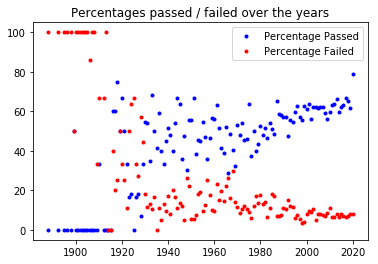

In [20]:
#import the Json data
bechdel_idmb_import  = pd.read_json("bechdel_imdb.json")
#sort the values by year
bechdel_idmb_import = bechdel_idmb_import.sort_values(by='year')
av_per_year = bechdel_idmb_import.groupby(['year']).mean()
print(av_per_year)# get an overview of the data


list_passed = []# list with percentage passed
list_failed = []# List with percentage failed
years = [] # list with the years
#get the percentage of the bechdel score 3 & 0 per year 
for year in bechdel_idmb_import.year.unique().tolist():
    yearly_data = bechdel_idmb_import[bechdel_idmb_import['year']==year]
    total_films = yearly_data['rating'].count()
    count_3 = yearly_data[yearly_data['rating']==3]
    count_0 = yearly_data[yearly_data['rating']==0]
    count_3 = count_3.count()
    count_0 = count_0.count()
    percentage_passed = (count_3/total_films)*100
    percentage_failed = (count_0/total_films)*100
    list_passed.append(percentage_passed[0])
    list_failed.append(percentage_failed[0])
    years.append(year)

#Load the data into a disctonary
percentage_bechdel_dic = {"year":years,"Percentage passed":list_passed,"Percentage failed":list_failed}
#laod the data into a dataframe
percentage_df = pd.DataFrame(percentage_bechdel_dic)
# plot the data in a graph in order to make a conclusion
plt.title("Percentages passed / failed over the years")
plt.plot(percentage_df['year'],percentage_df['Percentage passed'],".", color="b")
plt.plot(percentage_df['year'],percentage_df['Percentage failed'],".", color="r")
plt.legend(["Percentage Passed", "Percentage Failed"])
plt.show()

#As a result, more movies are passing and less movies are failing the test over time  